In [116]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
import pandas as pd

import numpy as np
data=pd.read_csv("OKKDATASET.csv")


##DATA UNDERSTANDING

In [142]:
data.shape
# data.head(10)
# # data.shape


(21609, 35)

In [118]:
data.describe()

,ID,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft)
count,2.161300e+04,2.160900e+04,21613.000000,21609.000000,21604.000000,2.160400e+04,21613.000000,21613.000000,21610.000000,21613.000000,21613.000000,21613.000000,21612.000000,21612.000000,21612.000000,21612.000000,21613.000000
mean,4.580302e+09,5.401984e+05,3.370842,2.114732,2079.931772,1.510776e+04,1.494309,7.623467,1788.344193,291.509045,46.994864,84.402258,98077.937766,47.560048,-122.213892,1986.538914,12768.455652
std,2.876566e+09,3.673890e+05,0.930062,0.770138,918.487597,4.142827e+04,0.539989,1.105439,827.982604,442.575043,29.373411,401.679240,53.505425,0.138565,0.140830,685.404255,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,1.000000,290.000000,0.000000,3.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1429.250000,5.040000e+03,1.000000,7.000000,1190.000000,0.000000,21.000000,0.000000,98033.000000,47.470975,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.617500e+03,1.500000,7.000000,1560.000000,0.000000,43.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068825e+04,2.000000,8.000000,2210.000000,560.000000,67.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,10.000000,9410.000000,4820.000000,118.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


array([[<Axes: title={'center': 'ID'}>,
        <Axes: title={'center': 'Sale Price'}>,
        <Axes: title={'center': 'No of Bedrooms'}>,
        <Axes: title={'center': 'No of Bathrooms'}>],
       [<Axes: title={'center': 'Flat Area (in Sqft)'}>,
        <Axes: title={'center': 'Lot Area (in Sqft)'}>,
        <Axes: title={'center': 'No of Floors'}>,
        <Axes: title={'center': 'Overall Grade'}>],
       [<Axes: title={'center': 'Area of the House from Basement (in Sqft)'}>,
        <Axes: title={'center': 'Basement Area (in Sqft)'}>,
        <Axes: title={'center': 'Age of House (in Years)'}>,
        <Axes: title={'center': 'Renovated Year'}>],
       [<Axes: title={'center': 'Zipcode'}>,
        <Axes: title={'center': 'Latitude'}>,
        <Axes: title={'center': 'Longitude'}>,
        <Axes: title={'center': 'Living Area after Renovation (in Sqft)'}>],
       [<Axes: title={'center': 'Lot Area after Renovation (in Sqft)'}>,
        <Axes: >, <Axes: >, <Axes: >]], dtype=obj

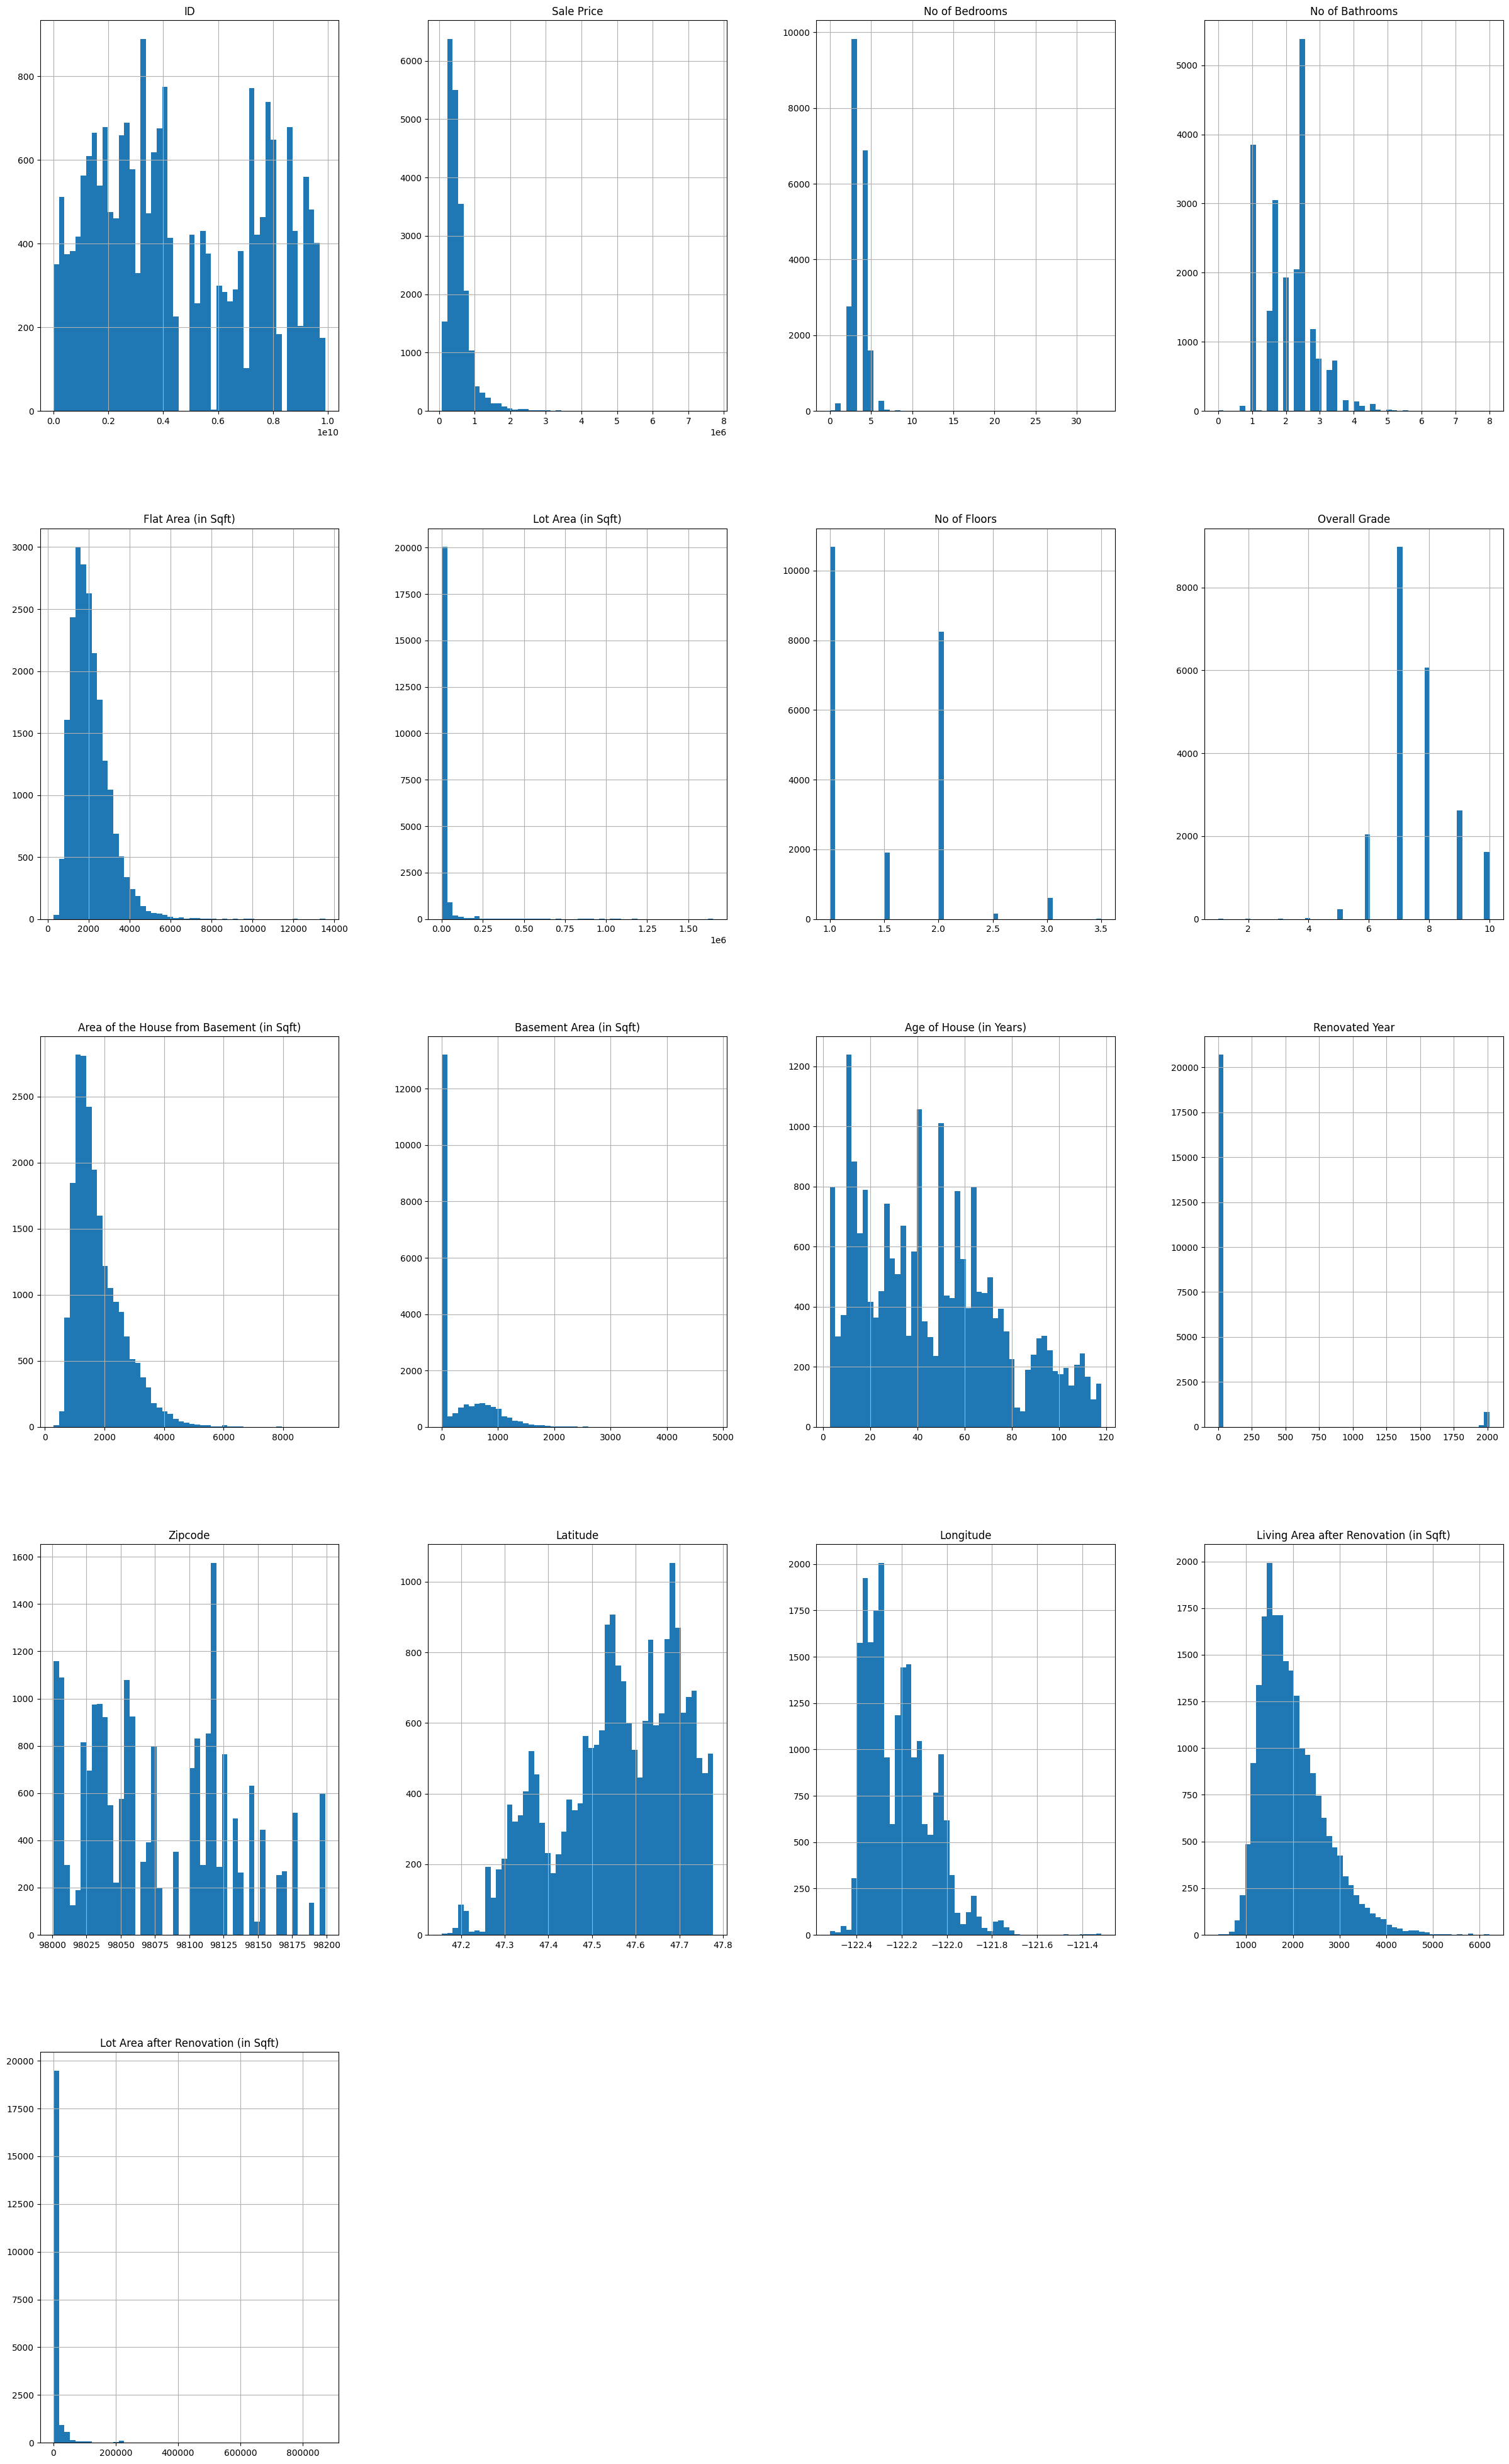

In [119]:
data.hist(bins=50,figsize=(30,50))

In [120]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   ID                                         21613 non-null  int64  
 1   Date House was Sold                        21613 non-null  object 
 2   Sale Price                                 21609 non-null  float64
 3   No of Bedrooms                             21613 non-null  int64  
 4   No of Bathrooms                            21609 non-null  float64
 5   Flat Area (in Sqft)                        21604 non-null  float64
 6   Lot Area (in Sqft)                         21604 non-null  float64
 7   No of Floors                               21613 non-null  float64
 8   Waterfront View                            21613 non-null  object 
 9   No of Times Visited                        2124 non-null   object 
 10  Condition of the House

#EXPLORING THE TARGET VARIABLE

In [121]:
# outlier finding

# there are outlier in the datset
q1=data['Sale Price'].quantile(0.25)
q3=data['Sale Price'].quantile(0.75)
iqr=q3-q1
upper_limit=q3+1.5*iqr
lower_limit=q1-1.5*iqr
print(lower_limit,upper_limit)
# outlier tretaing fxn 
def outlier(value):
    if value>upper_limit:
        return upper_limit
    if value<lower_limit:
        return lower_limit
    else:
        return value
    
data['Sale Price']=data['Sale Price'].apply(outlier)
data.describe()
data.dropna(inplace=True ,axis=0,subset=['Sale Price'])
data.info()





-162625.0 1129575.0
<class 'pandas.core.frame.DataFrame'>
Index: 21609 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   ID                                         21609 non-null  int64  
 1   Date House was Sold                        21609 non-null  object 
 2   Sale Price                                 21609 non-null  float64
 3   No of Bedrooms                             21609 non-null  int64  
 4   No of Bathrooms                            21605 non-null  float64
 5   Flat Area (in Sqft)                        21600 non-null  float64
 6   Lot Area (in Sqft)                         21600 non-null  float64
 7   No of Floors                               21609 non-null  float64
 8   Waterfront View                            21609 non-null  object 
 9   No of Times Visited                        2124 non-null   object 
 10  Conditi

#INDEPENDENT VARIABLE IN  THE DATASET

In [122]:
numarical_column=['No of Bathrooms','Flat Area (in Sqft)', 'Lot Area (in Sqft)','Area of the House from Basement (in Sqft)','Latitude' ,'Longitude','Living Area after Renovation (in Sqft)']
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(missing_values=np.nan,strategy='median')
data[numarical_column]=imputer.fit_transform(data[numarical_column])
data['No of Times Visited'].fillna(0,inplace=True)
data.info()
coloumns=data['Zipcode'].values.reshape(-1,1)
impute=SimpleImputer(missing_values=np.nan,strategy='most_frequent')
data['Zipcode']=impute.fit_transform(coloumns)



<class 'pandas.core.frame.DataFrame'>
Index: 21609 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   ID                                         21609 non-null  int64  
 1   Date House was Sold                        21609 non-null  object 
 2   Sale Price                                 21609 non-null  float64
 3   No of Bedrooms                             21609 non-null  int64  
 4   No of Bathrooms                            21609 non-null  float64
 5   Flat Area (in Sqft)                        21609 non-null  float64
 6   Lot Area (in Sqft)                         21609 non-null  float64
 7   No of Floors                               21609 non-null  float64
 8   Waterfront View                            21609 non-null  object 
 9   No of Times Visited                        21609 non-null  object 
 10  Condition of the House     

In [123]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21609 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   ID                                         21609 non-null  int64  
 1   Date House was Sold                        21609 non-null  object 
 2   Sale Price                                 21609 non-null  float64
 3   No of Bedrooms                             21609 non-null  int64  
 4   No of Bathrooms                            21609 non-null  float64
 5   Flat Area (in Sqft)                        21609 non-null  float64
 6   Lot Area (in Sqft)                         21609 non-null  float64
 7   No of Floors                               21609 non-null  float64
 8   Waterfront View                            21609 non-null  object 
 9   No of Times Visited                        21609 non-null  object 
 10  Condition of the House     

#Variable TransFormation

In [124]:
if 'ID' in data.columns:
    data.drop('ID',inplace=True,axis=1)
data.head(10)

,Date House was Sold,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,Condition of the House,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft)
0,14-Oct-17,221900.0,3,1.00,1180.0,5650.0,1.0,No,0,Fair,7,1180.0,0,63,0,98178.0,47.5112,-122.257,1340.0,5650
1,14-Dec-17,538000.0,3,2.25,2570.0,7242.0,2.0,No,0,Fair,7,2170.0,400,67,1991,98125.0,47.7210,-122.319,1690.0,7639
2,15-Feb-16,180000.0,2,1.00,770.0,10000.0,1.0,No,0,Fair,6,770.0,0,85,0,98028.0,47.7379,-122.233,2720.0,8062
3,14-Dec-17,604000.0,4,3.00,1960.0,5000.0,1.0,No,0,Excellent,7,1050.0,910,53,0,98136.0,47.5208,-122.393,1360.0,5000
4,15-Feb-16,510000.0,3,2.00,1680.0,8080.0,1.0,No,0,Fair,8,1680.0,0,31,0,98074.0,47.6168,-122.045,1800.0,7503
5,14-May-17,1129575.0,4,4.50,5420.0,101930.0,1.0,No,0,Fair,10,3890.0,1530,17,0,98053.0,47.6561,-122.005,4760.0,101930
6,14-Jun-17,257500.0,3,2.25,1715.0,6819.0,2.0,No,0,Fair,7,1715.0,0,23,0,98003.0,47.3097,-122.327,2238.0,6819
7,15-Jan-16,291850.0,3,1.50,1060.0,9711.0,1.0,No,0,Fair,7,1060.0,0,55,0,98198.0,47.4095,-122.315,1650.0,9711
8,15-Apr-16,229500.0,3,1.00,1780.0,7470.0,1.0,No,0,Fair,7,1050.0,730,58,0,98146.0,47.5123,-122.337,1780.0,8113
9,15-Mar-16,323000.0,3,2.50,1890.0,6560.0,2.0,No,0,Fair,7,1890.0,0,15,0,98038.0,47.3684,-122.031,2390.0,7570


In [125]:

if 'Date House was Sold' in data.columns:
     data['Purchase_year']=pd.DatetimeIndex(data['Date House was Sold']).year
     data['ever_Renovated']=np.where(data['Renovated Year']==0,'No','Yes')
     data.drop('Date House was Sold',inplace=True,axis=1)
if 'Renovated Year' in  data.columns:
     data.drop('Renovated Year',axis=1,inplace=True)
# data.drop('Renovated Year',inplace=True,axis=1)
data['Zipcode']=data['Zipcode'].astype(object)
data.dtypes

Sale Price                                   float64
No of Bedrooms                                 int64
No of Bathrooms                              float64
Flat Area (in Sqft)                          float64
Lot Area (in Sqft)                           float64
No of Floors                                 float64
Waterfront View                               object
No of Times Visited                           object
Condition of the House                        object
Overall Grade                                  int64
Area of the House from Basement (in Sqft)    float64
Basement Area (in Sqft)                        int64
Age of House (in Years)                        int64
Zipcode                                       object
Latitude                                     float64
Longitude                                    float64
Living Area after Renovation (in Sqft)       float64
Lot Area after Renovation (in Sqft)            int64
Purchase_year                                 

#Numarical to Categorical data

In [126]:
data.dtypes

Sale Price                                   float64
No of Bedrooms                                 int64
No of Bathrooms                              float64
Flat Area (in Sqft)                          float64
Lot Area (in Sqft)                           float64
No of Floors                                 float64
Waterfront View                               object
No of Times Visited                           object
Condition of the House                        object
Overall Grade                                  int64
Area of the House from Basement (in Sqft)    float64
Basement Area (in Sqft)                        int64
Age of House (in Years)                        int64
Zipcode                                       object
Latitude                                     float64
Longitude                                    float64
Living Area after Renovation (in Sqft)       float64
Lot Area after Renovation (in Sqft)            int64
Purchase_year                                 

In [127]:
data=pd.get_dummies(data,columns=['Waterfront View','No of Times Visited','Condition of the House','ever_Renovated'],drop_first=True,dtype=int)





In [128]:
data.dtypes
data.head(10)

,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),...,Waterfront View_Yes,No of Times Visited_Four,No of Times Visited_Once,No of Times Visited_Thrice,No of Times Visited_Twice,Condition of the House_Excellent,Condition of the House_Fair,Condition of the House_Good,Condition of the House_Okay,ever_Renovated_Yes
0,221900.0,3,1.00,1180.0,5650.0,1.0,7,1180.0,0,63,...,0,0,0,0,0,0,1,0,0,0
1,538000.0,3,2.25,2570.0,7242.0,2.0,7,2170.0,400,67,...,0,0,0,0,0,0,1,0,0,1
2,180000.0,2,1.00,770.0,10000.0,1.0,6,770.0,0,85,...,0,0,0,0,0,0,1,0,0,0
3,604000.0,4,3.00,1960.0,5000.0,1.0,7,1050.0,910,53,...,0,0,0,0,0,1,0,0,0,0
4,510000.0,3,2.00,1680.0,8080.0,1.0,8,1680.0,0,31,...,0,0,0,0,0,0,1,0,0,0
5,1129575.0,4,4.50,5420.0,101930.0,1.0,10,3890.0,1530,17,...,0,0,0,0,0,0,1,0,0,0
6,257500.0,3,2.25,1715.0,6819.0,2.0,7,1715.0,0,23,...,0,0,0,0,0,0,1,0,0,0
7,291850.0,3,1.50,1060.0,9711.0,1.0,7,1060.0,0,55,...,0,0,0,0,0,0,1,0,0,0
8,229500.0,3,1.00,1780.0,7470.0,1.0,7,1050.0,730,58,...,0,0,0,0,0,0,1,0,0,0
9,323000.0,3,2.50,1890.0,6560.0,2.0,7,1890.0,0,15,...,0,0,0,0,0,0,1,0,0,0


In [129]:
Zip_table=data.groupby('Zipcode').agg({'Sale Price':'mean'}).sort_values('Sale Price')
# Zip_table.head()
Zip_table['Zipcode_group']=pd.cut(Zip_table['Sale Price'],bins=10,labels=['zip1','zip2','zip3','zip4','zip5','zip6','zip7','zip8','zip9','zip10'],include_lowest=True)
Zip_table.head(10)

,Sale Price,Zipcode_group
Zipcode,,
98002.0,234284.035176,zip1
98168.0,240328.371747,zip1
98032.0,251296.240000,zip1
98001.0,280804.690608,zip1
98148.0,284908.596491,zip1
98023.0,286486.572289,zip1
98188.0,289078.345588,zip1
98003.0,294111.278571,zip1
98030.0,296187.980469,zip1


In [130]:
Zip_table.drop(columns='Sale Price',inplace=True,axis=1)
data=pd.merge(data,Zip_table,left_on='Zipcode',how='left',right_index=True)
data=pd.get_dummies(data,columns=['Zipcode_group'],drop_first=True,dtype=int)




data.head(10)

,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),...,ever_Renovated_Yes,Zipcode_group_zip2,Zipcode_group_zip3,Zipcode_group_zip4,Zipcode_group_zip5,Zipcode_group_zip6,Zipcode_group_zip7,Zipcode_group_zip8,Zipcode_group_zip9,Zipcode_group_zip10
0,221900.0,3,1.00,1180.0,5650.0,1.0,7,1180.0,0,63,...,0,0,0,0,0,0,0,0,0,0
1,538000.0,3,2.25,2570.0,7242.0,2.0,7,2170.0,400,67,...,1,0,1,0,0,0,0,0,0,0
2,180000.0,2,1.00,770.0,10000.0,1.0,6,770.0,0,85,...,0,0,1,0,0,0,0,0,0,0
3,604000.0,4,3.00,1960.0,5000.0,1.0,7,1050.0,910,53,...,0,0,0,1,0,0,0,0,0,0
4,510000.0,3,2.00,1680.0,8080.0,1.0,8,1680.0,0,31,...,0,0,0,0,1,0,0,0,0,0
5,1129575.0,4,4.50,5420.0,101930.0,1.0,10,3890.0,1530,17,...,0,0,0,0,1,0,0,0,0,0
6,257500.0,3,2.25,1715.0,6819.0,2.0,7,1715.0,0,23,...,0,0,0,0,0,0,0,0,0,0
7,291850.0,3,1.50,1060.0,9711.0,1.0,7,1060.0,0,55,...,0,0,0,0,0,0,0,0,0,0
8,229500.0,3,1.00,1780.0,7470.0,1.0,7,1050.0,730,58,...,0,1,0,0,0,0,0,0,0,0
9,323000.0,3,2.50,1890.0,6560.0,2.0,7,1890.0,0,15,...,0,1,0,0,0,0,0,0,0,0


machine learning model

In [143]:


# Assume we have a DataFrame 'data'
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Convert the scaled data back to a DataFrame
data = pd.DataFrame(data_scaled, columns=data.columns)

X_train, X_test, y_train, y_test = train_test_split(data.iloc[:,1:], data.iloc[:,0], test_size=0.05, random_state=0)
knn = KNeighborsRegressor(n_neighbors=5)

knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

# Calculate R-squared score
r_squared = knn.score(X_test, y_test)
print("R-squared kNN:", r_squared*100)


R-squared kNN: 86.11430976784725


In [144]:

from sklearn.tree import DecisionTreeRegressor


# Assume we have a DataFrame 'data'
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Convert the scaled data back to a DataFrame
data = pd.DataFrame(data_scaled, columns=data.columns)

X_train, X_test, y_train, y_test = train_test_split(data.iloc[:,1:], data.iloc[:,0], test_size=0.05, random_state=0)
dt = DecisionTreeRegressor(random_state=0)

dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

# Calculate R-squared score
r_squared = dt.score(X_test, y_test)
print("R-squared for decsion tree:", r_squared*100)


R-squared for decsion tree: 77.95985630370274


In [146]:

from sklearn.linear_model import BayesianRidge


# Assume we have a DataFrame 'data'
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Convert the scaled data back to a DataFrame
data = pd.DataFrame(data_scaled, columns=data.columns)

X_train, X_test, y_train, y_test = train_test_split(data.iloc[:,1:], data.iloc[:,0], test_size=0.05, random_state=0)
br = BayesianRidge()

br.fit(X_train, y_train)
y_pred = br.predict(X_test)

# Print the predicted values
r_squared = br.score(X_test, y_test)
print("R-squared baysion regressor:", r_squared*100)

R-squared baysion regressor: 83.75483553401865
